# 🍽️ **Sentiment Analysis of Bacchanal Buffet Reviews** 📊  

- When it comes to high-end buffets, **Bacchanal Buffet** stands as a culinary giant, renowned for its extravagant selections and lavish presentation. However, not every dining experience is a five-star affair. To uncover the hidden dynamics behind customer opinions, we embark on a journey through Yelp reviews, utilizing **Natural Language Processing (NLP)** and **Machine Learning (ML)** to dissect sentiment patterns.

- This project is powered by **authentic customer feedback sourced from Yelp**, allowing us to analyze **star ratings**, textual reviews, and sentiment trends with data-driven precision. From **data visualization** to **sentiment classification**, we will extract actionable insights that can serve businesses and researchers alike.

---

## 🔍 **Project Objectives**  

✅ **Exploratory Data Analysis (EDA)** – Understanding key statistical patterns within the dataset  
✅ **Visualizations & Word Clouds** – Bringing textual data to life with meaningful graphical representations  
✅ **Top Negative Keywords** – Identifying the seven most frequently used words in negative reviews  
✅ **Text Cleaning & NLP Techniques** – Preprocessing text to enhance model efficiency  
✅ **TF-IDF Vectorization** – Transforming text data into structured numerical insights  
✅ **Polarity Detection** – Evaluating sentiment strengths to distinguish positive and negative tones  
✅ **ML-Based Sentiment Prediction** – Applying four different ML algorithms to predict sentiment ratings based on review text  

<div style="text-align: center;">
    <img src="https://images.pexels.com/photos/1121482/pexels-photo-1121482.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" alt="Image">
</div>

### Importing the necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

import nltk
import re
import neattext as nt
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
from langdetect import detect
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample

### Importing the data

In [2]:
df=pd.read_csv('restaurant.csv')

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [5]:
df.shape

(10417, 10)

In [6]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


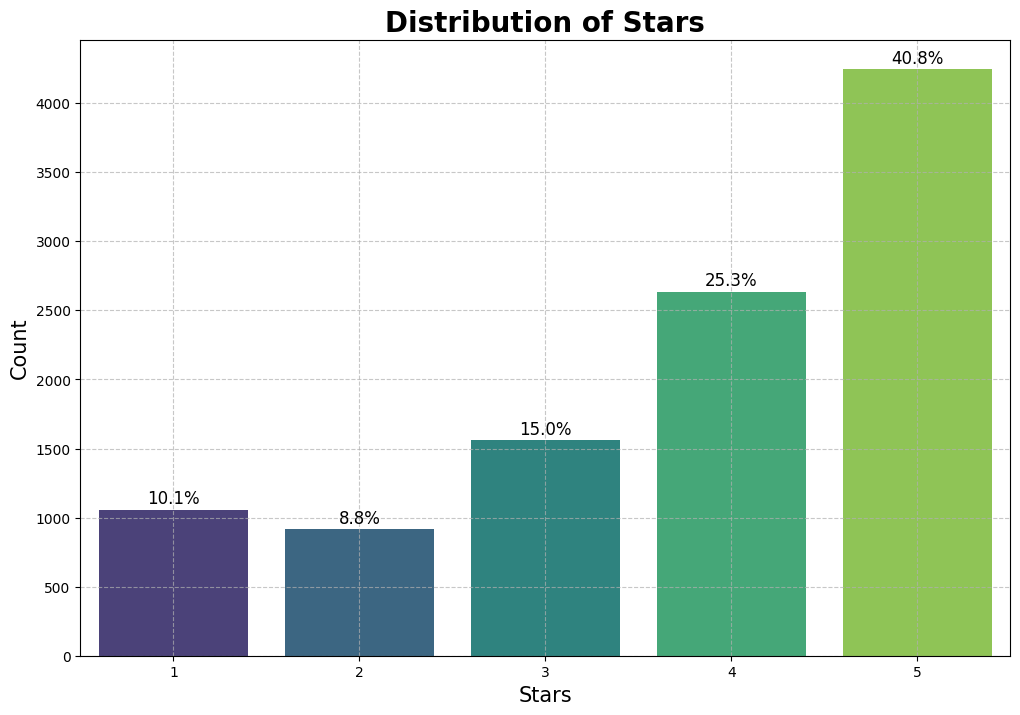

In [8]:
#distribution of stars
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='stars', data=df, palette='viridis')
for i in ax.patches:
    ax.annotate(f'{i.get_height() / len(df) * 100:.1f}%', 
                (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', size=12, xytext=(0, 8), 
                textcoords='offset points')

plt.title('Distribution of Stars', fontsize=20, fontweight='bold')
plt.xlabel('Stars', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Feature Engineering

In [9]:
#extracting the year and month from the "date" column
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

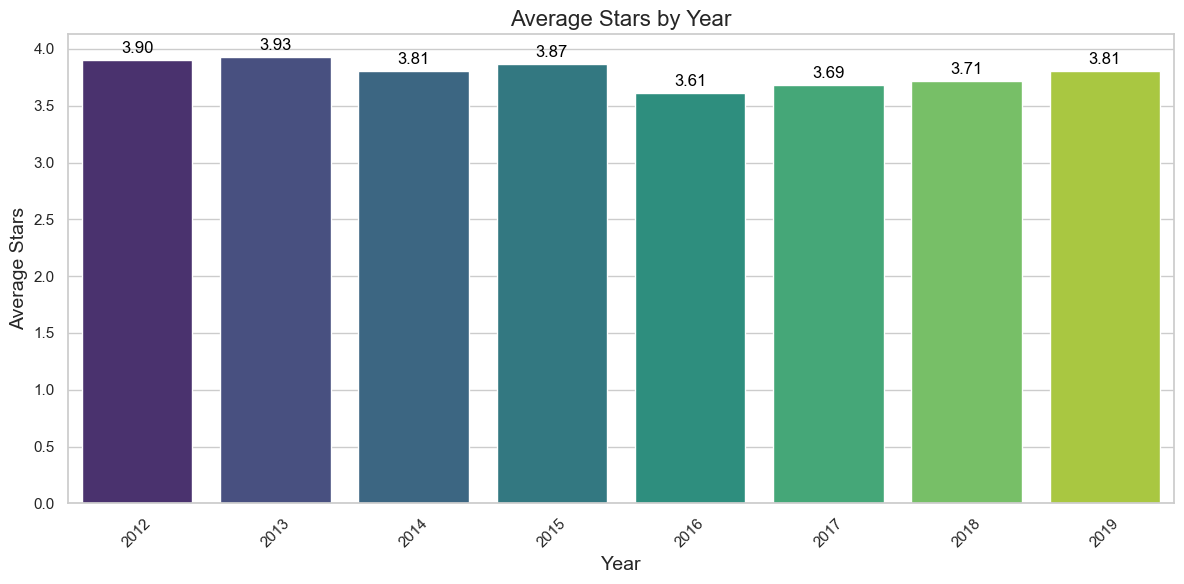

In [10]:
#average stars by year
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='year', y='stars', data=df, palette='viridis', ci=None)
plt.title('Average Stars by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Stars', fontsize=14)
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', fontsize=12, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

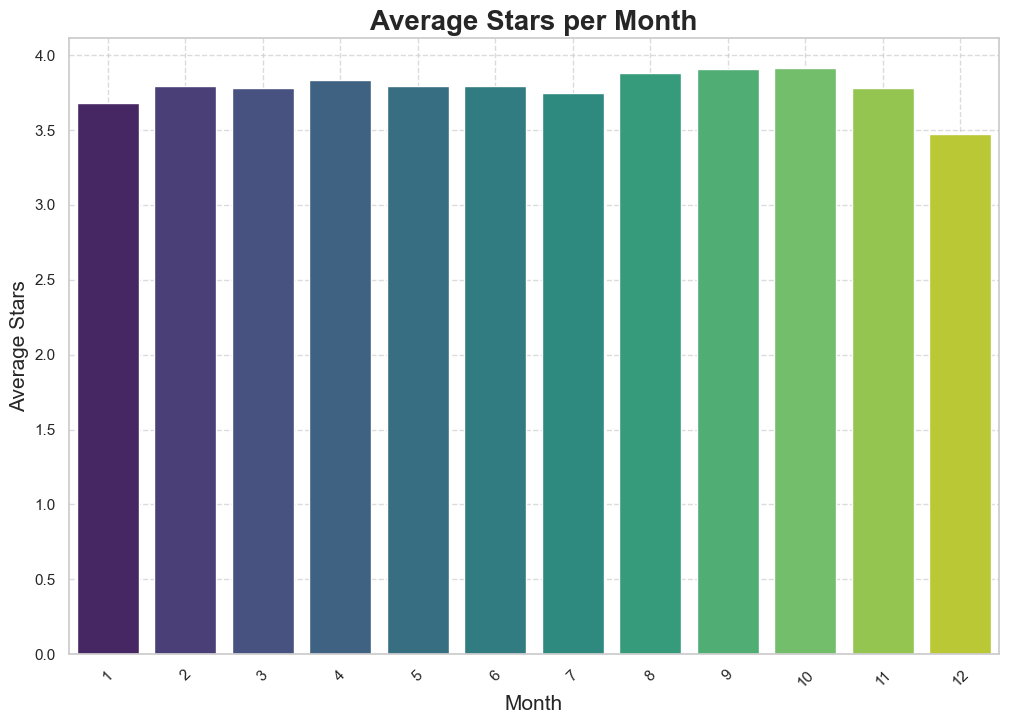

In [11]:
#average stars per month
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='stars', data=df, palette='viridis', ci=None)

plt.title('Average Stars per Month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Stars', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [12]:
#dropping the columns that will not be used in the model
df = df.drop(['Unnamed: 0', 'review_id', 'user_id','business_id','date'], axis=1)

In [13]:
#assigning sentiment values based on star ratings
df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive' 

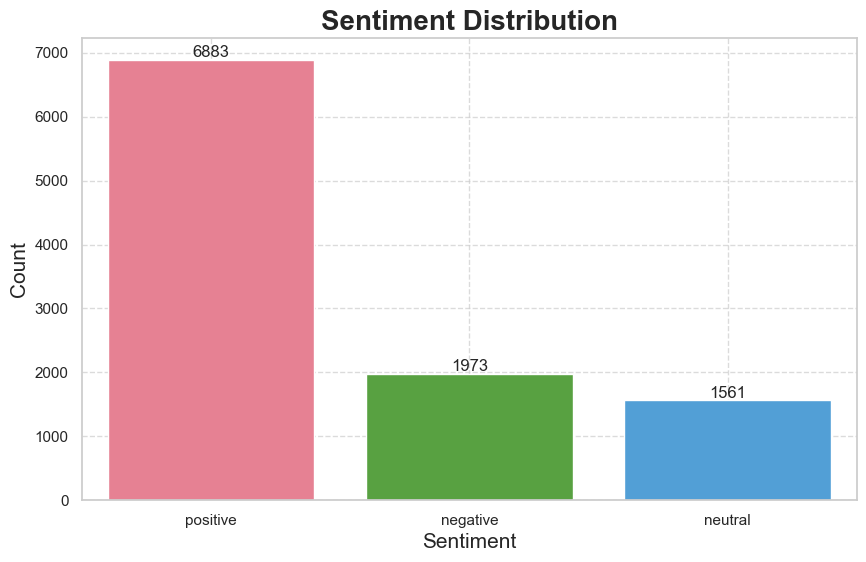

In [14]:
#sentiment distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['sentiment'], palette='husl')
plt.title('Sentiment Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.show()

In [15]:
#cleaning the text
df['text'] = (df['text'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\d+', '', regex=True).str.replace('\n', '', regex=True).str.replace('\r', '', regex=True))

In [16]:
df.text[120]

'we saw all the hype about this new buffet being built bottom line not as great as we expected they stopped serving snow crabs due to complaints we walked by during lunch asked a women what time dinner started pm and i specifically asked will you guys be serving king crab yes we get inside at pm beat the lines and guess what no snow crab no king crab the cooks said they only serve king crab on the holidays you kidding me food presentation wise i would rate a star compared to wicked spoon and bellagio they have great presentation on there food and it has great flavors bellagio serves king crab every night for dinner we were so disappointed try wicked spoon at cosmo there food is delicious and beautifully put together bellagio buffet has great selections and all you can eat king crab for dinner oh and the other thing that bothered me is at the front they display all sorts of seafood fish crab and lobster most of what they have on display is not even served on there buffet very deceiving'

In [17]:
#dropping the comments that are not in english
df['is_english'] = df['text'].apply(lambda x: detect(x) == 'en')
df = df[df['is_english']].drop(columns=['is_english'])

### Word Cloud

In [18]:
#function to create and visualize a word cloud based on the text data
def wc(data,bgcolor): 
    plt.figure(figsize=(10,19)) 
    mask=np.array(Image.open('cloud.png')) 
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask) 
    wc.generate(' '.join(data)) 
    plt.imshow(wc) 
    plt.axis('off') 
    plt.show()

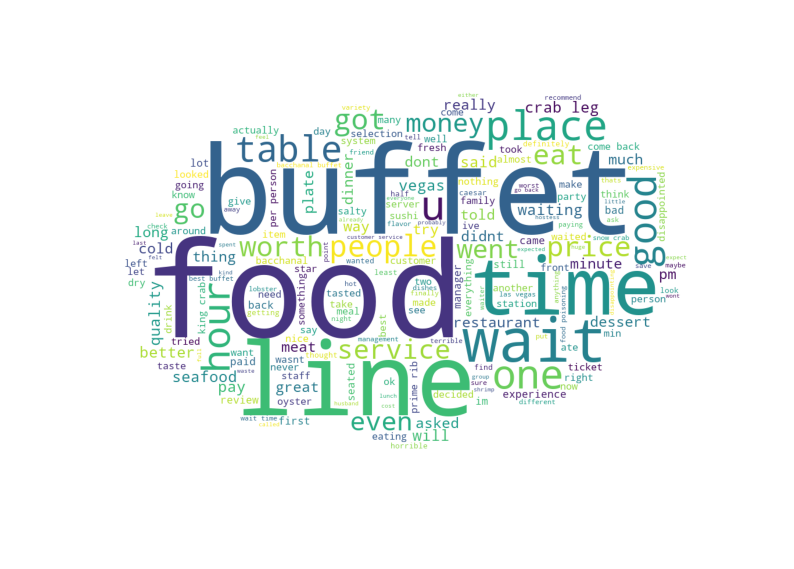

In [19]:
#1 star ratings word cloud
one = df[df['stars']==1]["text"]
wc(one,'white')

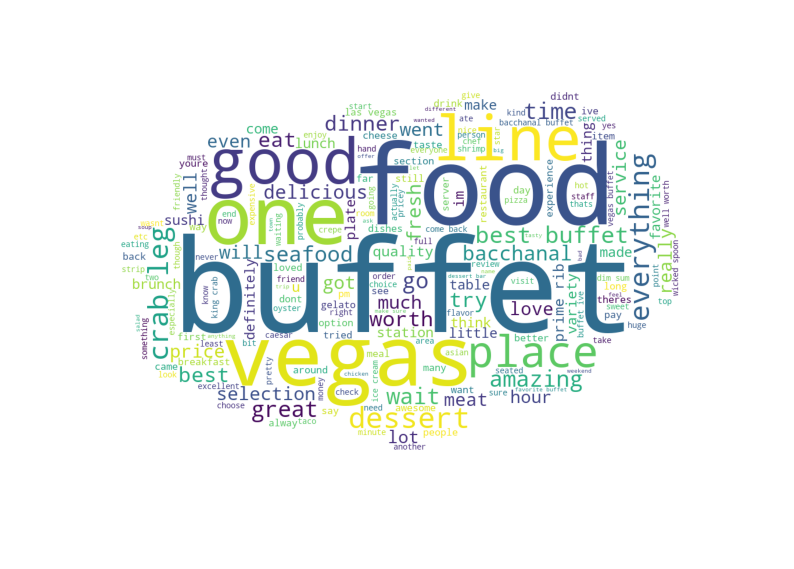

In [20]:
#5 star ratings word cloud
five=df[df['stars']==5]["text"]
wc(five,'white')

### Sentiment Analysis

In [21]:
#preparing the data for text analysis by filtering specific ratings and setting up a vectorization process that includes stemming
ybw = df[(df.stars==1)|(df.stars==5)]
vect = CountVectorizer() 
pr=PorterStemmer()
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]
vect=CountVectorizer(stop_words='english',ngram_range=(1,2), analyzer=lemmafn)

In [22]:
#detecting polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [23]:
df['polarity']=df['text'].apply(detect_sentiment)

In [24]:
df.head()

,stars,useful,funny,cool,text,year,month,sentiment,polarity
0,5,0,1,0,after getting food poisoning at the palms hote...,2012,12,positive,0.337330
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014,1,positive,0.219409
2,4,1,1,1,the crab legs are better than the ones at wick...,2015,6,positive,-0.134722
3,1,0,0,0,not worth it too salty food and expensive this...,2016,12,negative,-0.325000
4,5,0,0,0,i would give this infinite stars if i could my...,2015,7,positive,0.362500


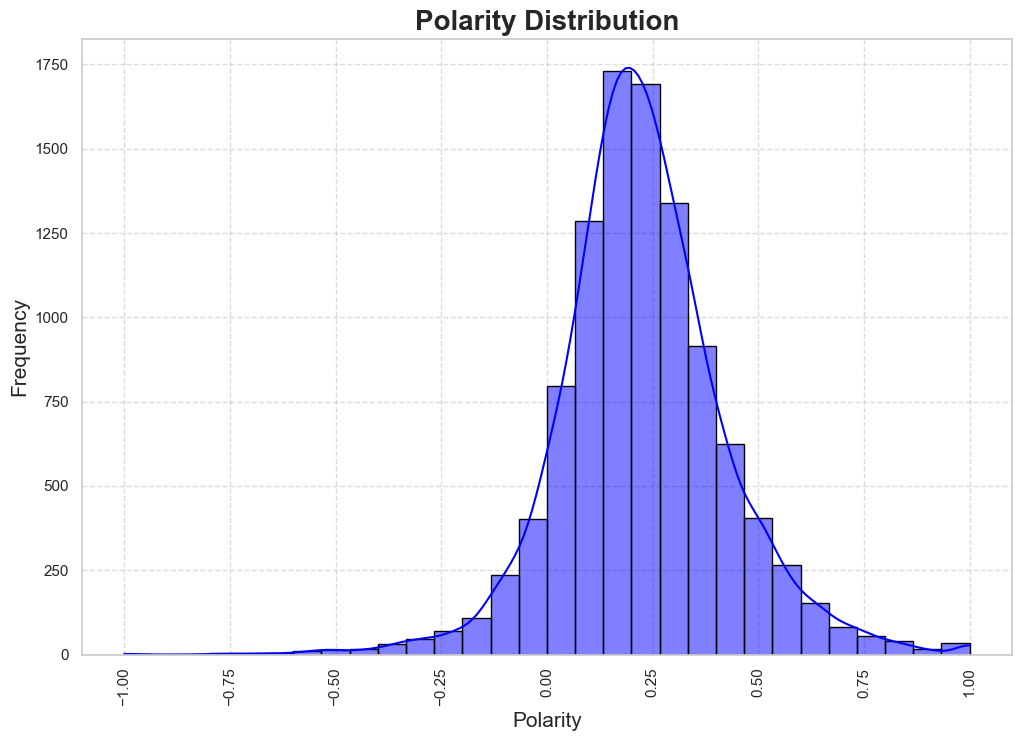

In [25]:
#polarity distribution
plt.figure(figsize=(12, 8))
sns.histplot(x=df['polarity'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Polarity Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Polarity', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

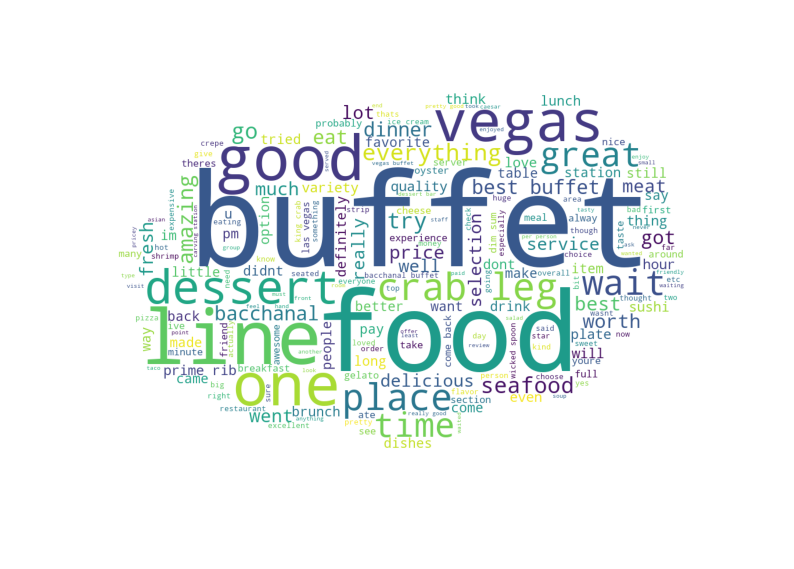

In [26]:
#positive reviews word cloud
positive_reviews = df[df['sentiment'] == 'positive']['text']
wc(positive_reviews,'white')

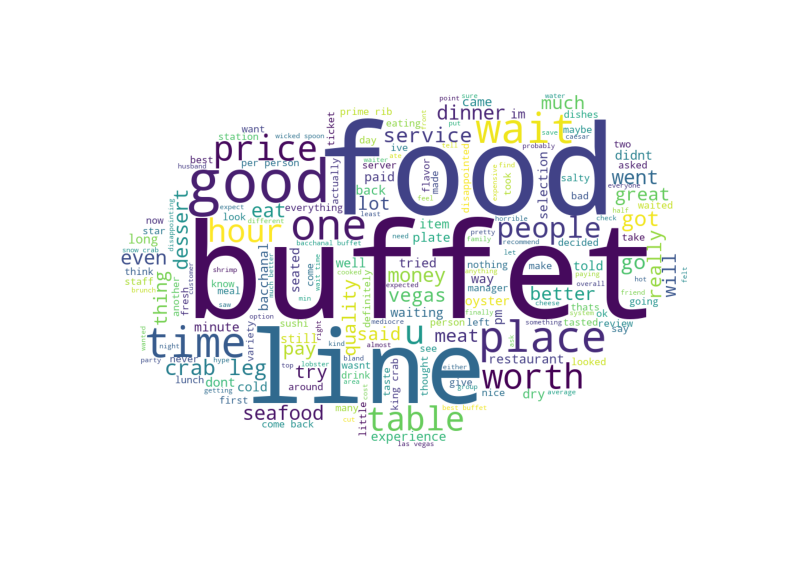

In [27]:
#negative reviews word cloud
negative_reviews=df[df['sentiment'] == 'negative']['text']
wc(negative_reviews,'white')

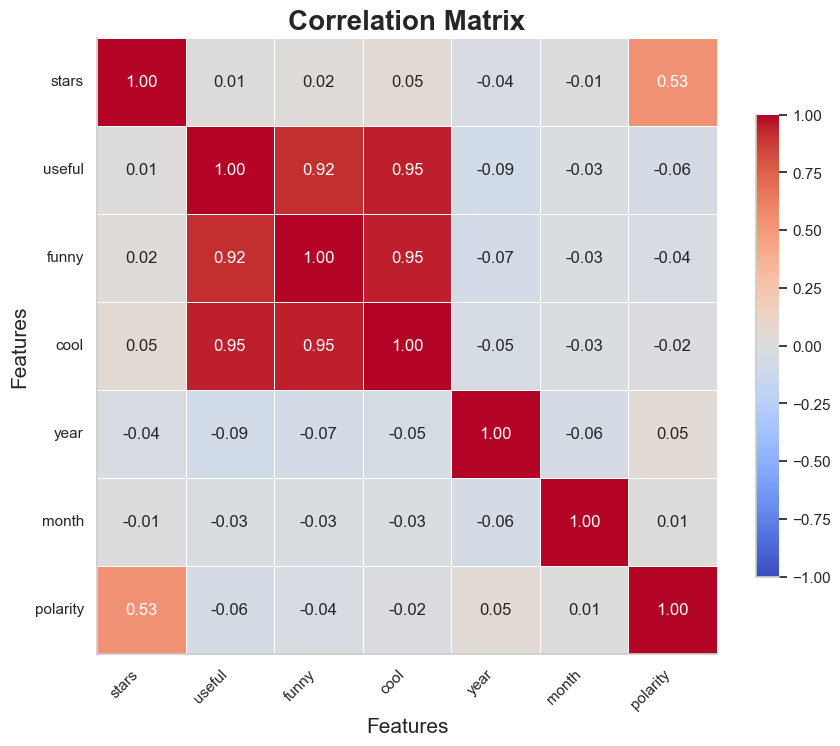

In [28]:
#correlation matrix
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
heatmap = sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'shrink': 0.75})
heatmap.set_title('Correlation Matrix', fontsize=20, fontweight='bold')
heatmap.set_xlabel('Features', fontsize=15)
heatmap.set_ylabel('Features', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
sns.despine()
plt.show()

### The seven most frequently used words in the negative class 

In [29]:
negative_reviews = df[df['sentiment'] == 'negative']['text']

stop_words = set(stopwords.words('english'))
word_counter = Counter()
for text in negative_reviews:
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    word_counter.update(filtered_words)

most_common_words = word_counter.most_common(7)
print(most_common_words)

[('food', 2663), ('buffet', 2487), ('line', 1491), ('get', 1300), ('good', 1226), ('wait', 1104), ('time', 1100)]


### ML modelling to predict sentiment

In [30]:
#oversampling the minority classes to balance all
positive = df[df['sentiment'] == 'positive']
negative = df[df['sentiment'] == 'negative']
neutral = df[df['sentiment'] == 'neutral']

negative_oversampled = resample(negative, replace=True, n_samples=6853, random_state=42)
neutral_oversampled = resample(neutral, replace=True, n_samples=6853, random_state=42)

balanced_df = pd.concat([positive, negative_oversampled, neutral_oversampled])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [31]:
vectorizer = TfidfVectorizer()
x=vectorizer.fit_transform(balanced_df['text'])
y=balanced_df['sentiment']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
#evaluating algorithms
def evaluate_models(data):
    models = {
        'LogisticRegression': LogisticRegression(), 'RandomForestClassifier': RandomForestClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(), 'GradientBoostingClassifier': GradientBoostingClassifier()}
    results = {}
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = accuracy
    return pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
    
results_df = evaluate_models(df)
results_df

,Model,Accuracy
0,LogisticRegression,0.884241
1,RandomForestClassifier,0.975681
2,AdaBoostClassifier,0.642996
3,GradientBoostingClassifier,0.786235


In [34]:
#fitting the best model
best_model = RandomForestClassifier()
best_model.fit(x_train, y_train)
y_pred_best = best_model.predict(x_test)

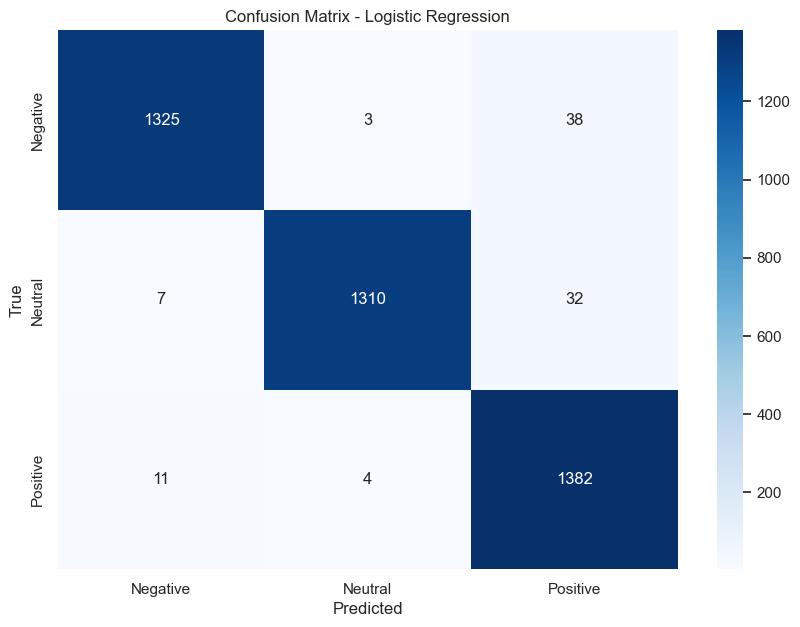

In [35]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
#classification report
class_report = classification_report(y_test, y_pred_best, target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
Negative,0.986597,0.969985,0.978221,1366.000000
Neutral,0.994685,0.971090,0.982746,1349.000000
Positive,0.951791,0.989263,0.970165,1397.000000
accuracy,0.976897,0.976897,0.976897,0.976897
macro avg,0.977691,0.976779,0.977044,4112.000000
weighted avg,0.977425,0.976897,0.976968,4112.000000


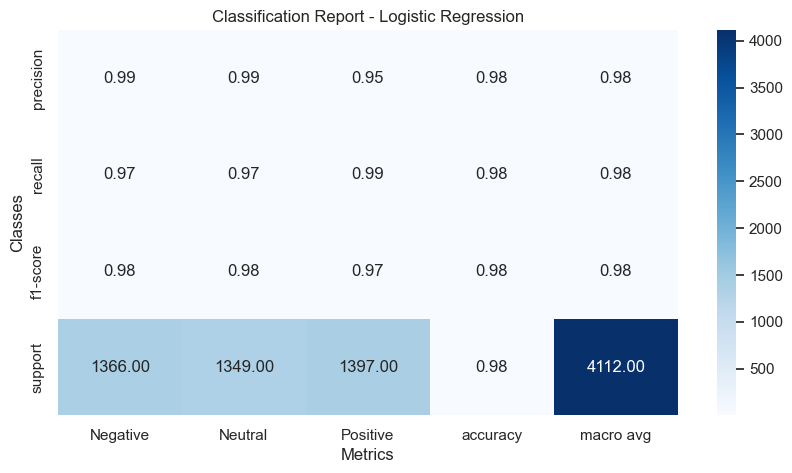

In [37]:
#visualization of classification report
plt.figure(figsize=(10, 5))
sns.heatmap(class_report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report - Logistic Regression')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## 🎯 **Results & Insights**  

- In this study, we explored **Yelp reviews** of Bacchanal Buffet, aiming to uncover sentiment trends using **Natural Language Processing (NLP)** and **Machine Learning (ML)**. Since sentiment distribution was initially **imbalanced**, we employed **oversampling techniques** to ensure equal representation of all classes.  

Four classification models were tested, yielding the following accuracy scores:  

| Model                    | Accuracy  |
|--------------------------|----------|
| **Logistic Regression**  | 0.884241  |
| **Random Forest**        | 0.975681  |
| **AdaBoost**             | 0.642996  |
| **Gradient Boosting**    | 0.786235  |

Among these, **RandomForestClassifier** demonstrated superior accuracy (**97.68%**), making it the most promising model for further refinement.  

---

## 🔑 **Key Takeaways & Future Directions**  

- **Robust Classification:** The **Random Forest model** significantly outperformed other classifiers, making it a strong candidate for sentiment prediction tasks.  
- **Balanced Sentiment Distribution:** Oversampling successfully mitigated the initial class imbalance, improving overall model performance.  
- **Real-World Applications:** This model could be used for **customer experience analysis**, helping businesses enhance their service quality based on data-driven insights.  

Moving forward, further optimizations such as **hyperparameter tuning** or **ensemble methods** may yield even stronger results! 🚀  